<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4 👼 Training Models
This chapter is mostly the mathematics and the idea behind the models that are used for training:)




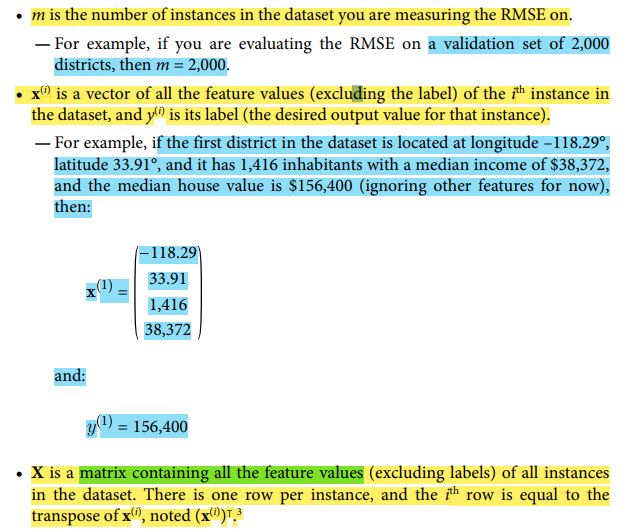

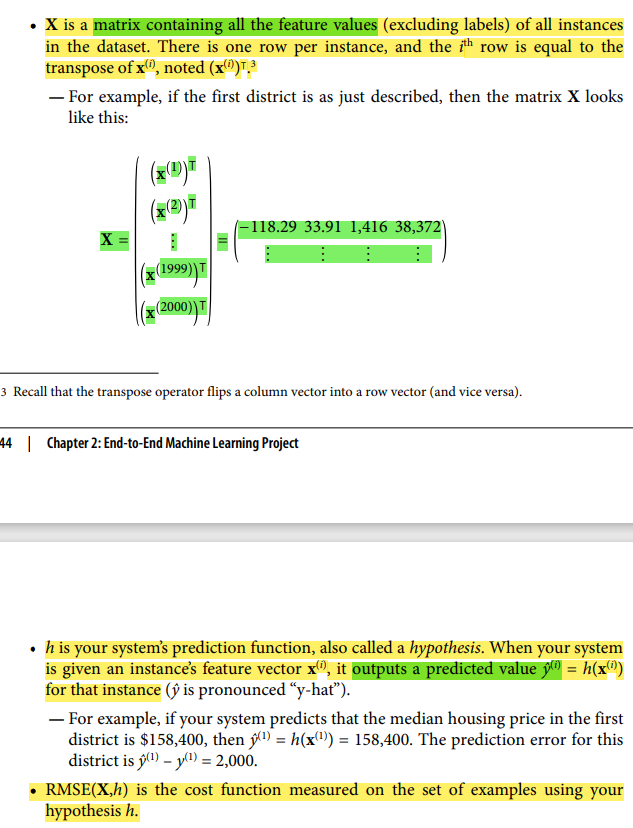

In [1]:
# part 1: Linear Regression
import numpy as np

np.random.seed(42)
m = 100 # number of instances in the dataset

X = 2*np.random.rand(m,1) #column vector
y = 4+3* X +np.random.randn(m,1) #column vector 
"""
rand() uses the uniform distribution on [0, 1] , while randn() 
uses the normal distribution with mean 0 and standard deviation 1.
"""


print("X: ", X)

print("y: ", y)

X:  [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [

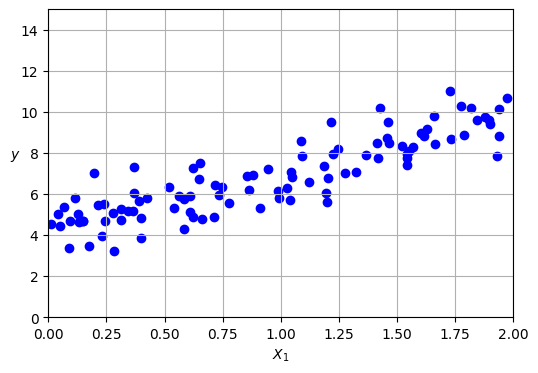

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize= (6,4))
plt.scatter(X, y, c="blue")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2,0, 15])
plt.grid()